<a href="https://colab.research.google.com/github/estefaniahernandezz/PROYECTO-ENTREGA-1-/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import re
import numpy as np
import pandas as pd

# Ruta base
BASE_PATH = "/content/drive/MyDrive/ARCHIVOS IA"
CSV_PATH = os.path.join(BASE_PATH, "train.csv")

pd.set_option("display.max_columns", 120)

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Carga rápida del CSV

In [2]:

df = pd.read_csv(CSV_PATH, low_memory=False)
print("Filas, columnas:", df.shape)
df.head()


Filas, columnas: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## 2) Limpieza básica (nombres y texto)

In [3]:

# Quitar espacios raros en nombres de columnas
df.columns = [c.strip() for c in df.columns]

# Pasar strings a formato 'bonito': sin espacios al inicio/fin
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

df.head(2)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264


## 3) Transformaciones sencillas

In [4]:
# === Conversión Sí/No/N a 1 y 0 ===
def to_binary(v):
    if pd.isna(v):
        return np.nan
    s = str(v).strip().lower()
    # limpiar tildes o caracteres extraños
    s = s.replace("í", "i").replace("Ã­", "i").replace("á", "a").replace("ã", "a")
    if s in ["si", "s", "yes", "y"]:
        return 1
    if s in ["no", "n"]:
        return 0
    if s in ["1", "true", "verdadero"]:
        return 1
    if s in ["0", "false", "falso"]:
        return 0
    return np.nan

# aplicar a todas las columnas que tengan Sí/No/N
for c in df.columns:
    if df[c].astype(str).str.lower().isin(["si", "sí", "s", "no", "n"]).any():
        df[c] = df[c].map(to_binary)

df.head(3)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,1.0,1.0,0,0.0,1.0,1.0,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0.0,Técnica o tecnológica completa,1.0,0.0,0,0.0,1.0,0.0,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,0.0,0.0,1.0,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


## 4) Valores faltantes

In [5]:

# Numéricas: medianas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Categóricas: "Desconocido"
cat_cols = df.select_dtypes(include='object').columns.tolist()
for c in cat_cols:
    df[c] = df[c].fillna("Desconocido")

df.isna().mean().sort_values(ascending=False).head(10)


,0
ID,0.0
PERIODO_ACADEMICO,0.0
E_PRGM_ACADEMICO,0.0
E_PRGM_DEPARTAMENTO,0.0
E_VALORMATRICULAUNIVERSIDAD,0.0
E_HORASSEMANATRABAJA,0.0
F_ESTRATOVIVIENDA,0.0
F_TIENEINTERNET,0.0
F_EDUCACIONPADRE,0.0
F_TIENELAVADORA,0.0


## 5) One-Hot para categóricas

In [6]:

df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=False)
print("Shape después de one-hot:", df_enc.shape)
df_enc.head(2)


Shape después de one-hot: (692500, 1045)


,ID,PERIODO_ACADEMICO,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,E_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL Y DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE COMERCIO EXTERIOR,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y GESTION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROPECUARIAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS COMERCIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICA,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y FINANZAS,E_PRGM_ACADEMICO_ADMINISTRACION DE GESTISN HUMANA,E_PRGM_ACADEMICO_ADMINISTRACION DE HOTELERIA Y TURISMO,E_PRGM_ACADEMICO_ADMINISTRACION DE INSTITUCIONES DE SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION DE LA CALIDAD,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD SOCIAL,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE SERVICIOS DE SALUD,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMATICOS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMÁTICOS,E_PRGM_ACADEMICO_ADMINISTRACION DEL COMERCIO INTERNACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DEL MEDIO AMBIENTE,E_PRGM_ACADEMICO_ADMINISTRACION DEL TURISMO SOSTENIBLE,E_PRGM_ACADEMICO_ADMINISTRACION DEPORTIVA,E_PRGM_ACADEMICO_ADMINISTRACION EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN LOGISTICA Y PRODUCCION,E_PRGM_ACADEMICO_ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES,...,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,E_VALORMATRICULAUNIVERSIDAD_nan,E_HORASSEMANATRABAJA_0,E_HORASSEMANATRABAJA_Entre 11 y 20 horas,E_HORASSEMANATRABAJA_Entre 21 y 30 horas,E_HORASSEMANATRABAJA_Menos de 10 horas,E_HORASSEMANATRABAJA_Más de 30 horas,E_HORASSEMANATRABAJA_nan,F_ESTRATOVIVIENDA_Estrato 1,F_ESTRATOVIVIENDA_Estrato 2,F_ESTRATOVIVIENDA_Estrato 3,F_ESTRATOVIVIENDA_Estrato 4,F_ESTRATOVIVIENDA_Estrato 5,F_ESTRATOVIVIENDA_Estrato 6,F_ESTRATOVIVIENDA_Sin Estrato,F_ESTRATOVIVIENDA_nan,F_EDUCACIONPADRE_Educación profesional completa,F_EDUCACIONPADRE_Educación profesional incompleta,F_EDUCACIONPADRE_Ninguno,F_EDUCACI

### 6) Escalado sencillo (z-score)

In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])
df_enc.head(2)


,ID,PERIODO_ACADEMICO,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,E_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL Y DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE COMERCIO EXTERIOR,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y GESTION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROPECUARIAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS COMERCIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICA,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y FINANZAS,E_PRGM_ACADEMICO_ADMINISTRACION DE GESTISN HUMANA,E_PRGM_ACADEMICO_ADMINISTRACION DE HOTELERIA Y TURISMO,E_PRGM_ACADEMICO_ADMINISTRACION DE INSTITUCIONES DE SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION DE LA CALIDAD,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD SOCIAL,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE SERVICIOS DE SALUD,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMATICOS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMÁTICOS,E_PRGM_ACADEMICO_ADMINISTRACION DEL COMERCIO INTERNACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DEL MEDIO AMBIENTE,E_PRGM_ACADEMICO_ADMINISTRACION DEL TURISMO SOSTENIBLE,E_PRGM_ACADEMICO_ADMINISTRACION DEPORTIVA,E_PRGM_ACADEMICO_ADMINISTRACION EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN LOGISTICA Y PRODUCCION,E_PRGM_ACADEMICO_ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES,...,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,E_VALORMATRICULAUNIVERSIDAD_nan,E_HORASSEMANATRABAJA_0,E_HORASSEMANATRABAJA_Entre 11 y 20 horas,E_HORASSEMANATRABAJA_Entre 21 y 30 horas,E_HORASSEMANATRABAJA_Menos de 10 horas,E_HORASSEMANATRABAJA_Más de 30 horas,E_HORASSEMANATRABAJA_nan,F_ESTRATOVIVIENDA_Estrato 1,F_ESTRATOVIVIENDA_Estrato 2,F_ESTRATOVIVIENDA_Estrato 3,F_ESTRATOVIVIENDA_Estrato 4,F_ESTRATOVIVIENDA_Estrato 5,F_ESTRATOVIVIENDA_Estrato 6,F_ESTRATOVIVIENDA_Sin Estrato,F_ESTRATOVIVIENDA_nan,F_EDUCACIONPADRE_Educación profesional completa,F_EDUCACIONPADRE_Educación profesional incompleta,F_EDUCACIONPADRE_Ninguno,F_EDUCACI

## 7) Comprobación de resultados.


In [8]:
# =========================================================
# Verificación rápida del preprocesado
# =========================================================

print("Forma final del DataFrame:", df_enc.shape)
print("- Filas:", df_enc.shape[0])
print("- Columnas:", df_enc.shape[1])
print()

# 1. Revisar que no queden valores nulos
faltantes = df_enc.isna().sum().sum()
print(f"Total de valores faltantes: {faltantes}")
print()

# 2. Estadísticas de columnas numéricas (primeras 10)
print("Estadísticas de columnas numéricas (primeras 10):")
display(df_enc[num_cols].describe().T[['mean', 'std']].head(10))
print()

# 3. Ejemplo de columnas One-Hot (departamentos)
print("Ejemplo de columnas One-Hot (departamentos):")
display(df_enc.filter(like='E_PRGM_DEPARTAMENTO').head(5))
print()

# 4. Top 10 categorías más comunes (suma de 1's)
print("Top 10 categorías más comunes (suma de 1's):")
display(df_enc.filter(like='E_PRGM_DEPARTAMENTO').sum().sort_values(ascending=False).head(10))
print()


# 5. Muestra aleatoria de 5 filas
print("Muestra aleatoria de 5 filas:")
display(df_enc.sample(5, random_state=42))

Forma final del DataFrame: (692500, 1045)
- Filas: 692500
- Columnas: 1045

Total de valores faltantes: 0

Estadísticas de columnas numéricas (primeras 10):


,mean,std
ID,-8.442376e-17,1.000001
PERIODO_ACADEMICO,6.243973e-14,1.000001
F_TIENEINTERNET,1.316428e-16,1.000001
F_TIENELAVADORA,-1.684576e-16,1.000001
F_TIENEAUTOMOVIL,7.615376e-17,1.000001
E_PRIVADO_LIBERTAD,1.539082e-19,1.000001
E_PAGOMATRICULAPROPIO,9.887061e-17,1.000001
F_TIENECOMPUTADOR,8.005277e-17,1.000001
F_TIENEINTERNET.1,1.316428e-16,1.000001
INDICADOR_1,-1.178013e-16,1.000001



Ejemplo de columnas One-Hot (departamentos):


,E_PRGM_DEPARTAMENTO_AMAZONAS,E_PRGM_DEPARTAMENTO_ANTIOQUIA,E_PRGM_DEPARTAMENTO_ARAUCA,E_PRGM_DEPARTAMENTO_ATLANTICO,E_PRGM_DEPARTAMENTO_BOGOTÁ,E_PRGM_DEPARTAMENTO_BOLIVAR,E_PRGM_DEPARTAMENTO_BOYACA,E_PRGM_DEPARTAMENTO_CALDAS,E_PRGM_DEPARTAMENTO_CAQUETA,E_PRGM_DEPARTAMENTO_CASANARE,E_PRGM_DEPARTAMENTO_CAUCA,E_PRGM_DEPARTAMENTO_CESAR,E_PRGM_DEPARTAMENTO_CHOCO,E_PRGM_DEPARTAMENTO_CORDOBA,E_PRGM_DEPARTAMENTO_CUNDINAMARCA,E_PRGM_DEPARTAMENTO_GUAVIARE,E_PRGM_DEPARTAMENTO_HUILA,E_PRGM_DEPARTAMENTO_LA GUAJIRA,E_PRGM_DEPARTAMENTO_MAGDALENA,E_PRGM_DEPARTAMENTO_META,E_PRGM_DEPARTAMENTO_NARIÑO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



Top 10 categorías más comunes (suma de 1's):


,0
E_PRGM_DEPARTAMENTO_BOGOTÁ,282159
E_PRGM_DEPARTAMENTO_ANTIOQUIA,83607
E_PRGM_DEPARTAMENTO_VALLE,44588
E_PRGM_DEPARTAMENTO_ATLANTICO,41020
E_PRGM_DEPARTAMENTO_SANTANDER,28828
E_PRGM_DEPARTAMENTO_NORTE SANTANDER,22588
E_PRGM_DEPARTAMENTO_BOLIVAR,20629
E_PRGM_DEPARTAMENTO_BOYACA,14048
E_PRGM_DEPARTAMENTO_CUNDINAMARCA,14018
E_PRGM_DEPARTAMENTO_NARIÑO,13454



Muestra aleatoria de 5 filas:


,ID,PERIODO_ACADEMICO,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,E_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL Y DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE COMERCIO EXTERIOR,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y GESTION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROPECUARIAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS COMERCIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICA,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y FINANZAS,E_PRGM_ACADEMICO_ADMINISTRACION DE GESTISN HUMANA,E_PRGM_ACADEMICO_ADMINISTRACION DE HOTELERIA Y TURISMO,E_PRGM_ACADEMICO_ADMINISTRACION DE INSTITUCIONES DE SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION DE LA CALIDAD,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD SOCIAL,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE SERVICIOS DE SALUD,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMATICOS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMÁTICOS,E_PRGM_ACADEMICO_ADMINISTRACION DEL COMERCIO INTERNACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DEL MEDIO AMBIENTE,E_PRGM_ACADEMICO_ADMINISTRACION DEL TURISMO SOSTENIBLE,E_PRGM_ACADEMICO_ADMINISTRACION DEPORTIVA,E_PRGM_ACADEMICO_ADMINISTRACION EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN LOGISTICA Y PRODUCCION,E_PRGM_ACADEMICO_ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES,...,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,E_VALORMATRICULAUNIVERSIDAD_nan,E_HORASSEMANATRABAJA_0,E_HORASSEMANATRABAJA_Entre 11 y 20 horas,E_HORASSEMANATRABAJA_Entre 21 y 30 horas,E_HORASSEMANATRABAJA_Menos de 10 horas,E_HORASSEMANATRABAJA_Más de 30 horas,E_HORASSEMANATRABAJA_nan,F_ESTRATOVIVIENDA_Estrato 1,F_ESTRATOVIVIENDA_Estrato 2,F_ESTRATOVIVIENDA_Estrato 3,F_ESTRATOVIVIENDA_Estrato 4,F_ESTRATOVIVIENDA_Estrato 5,F_ESTRATOVIVIENDA_Estrato 6,F_ESTRATOVIVIENDA_Sin Estrato,F_ESTRATOVIVIENDA_nan,F_EDUCACIONPADRE_Educación profesional completa,F_EDUCACIONPADRE_Educación profesional incompleta,F_EDUCACIONPADRE_Ninguno,F_EDUCACI

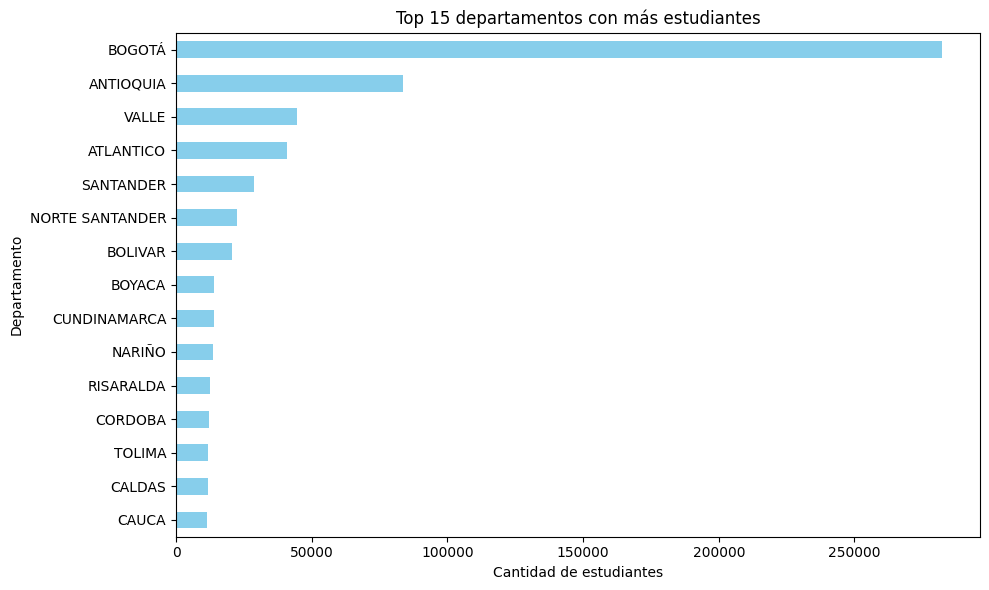